In [231]:
#import relevant libraries and set up nicely
from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,7)
plt.style.use('ggplot')

In [232]:
#Get the data from UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv'
urlretrieve(url, 'non-verbal%20tourist%20data.csv')
df = pd.read_csv(url, sep =',')
df.head(2)

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,...,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,...,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0


In [233]:
# Drop type of client as this is the result of the clustering
df.drop(labels = 'Type of Client', axis = 1, inplace = True)

In [234]:
# Change all non numeric datatypes to objects
df[['Hostile - friendly', 'Tense - relaxed']] = df[['Tense - relaxed', 'Hostile - friendly']].astype('object')

In [235]:
# Cleaning up weird things like '?'bor numbers that appear in categorical features
df['GImg3'].replace('?', 'likes', inplace = True)
df['PImg5'].replace('?', 'dislikes', inplace = True)
df['Authoritative -anarchic '].replace('?', '1', inplace = True)

In [236]:
#These two columns appear to have been mislabled
df.rename(columns= {'TAudio1': 'Proxemics', 'Proxemics':'TAudio1'}, inplace= True)

A little bit of EDA to catch anything interesting

In [237]:
df.describe()

,age
count,73.000000
mean,47.260274
std,15.115323
min,24.000000
25%,36.000000
50%,47.000000
75%,56.000000
max,81.000000


Of the 73 respondents, the youngest is 24 and the oldest is 81. The average customer in this survey is 47 years old. Roughly 75% of the people who participated are about 56 years old

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'england'),
  Text(1, 0, 'canada'),
  Text(2, 0, 'germany'),
  Text(3, 0, 'argentina'),
  Text(4, 0, 'polish'),
  Text(5, 0, 'scotland'),
  Text(6, 0, 'italy'),
  Text(7, 0, 'russia'),
  Text(8, 0, 'spain'),
  Text(9, 0, 'hungary'),
  Text(10, 0, 'uruguay'),
  Text(11, 0, 'brasil'),
  Text(12, 0, 'colombia'),
  Text(13, 0, 'chile'),
  Text(14, 0, 'cuba'),
  Text(15, 0, 'mexico')])

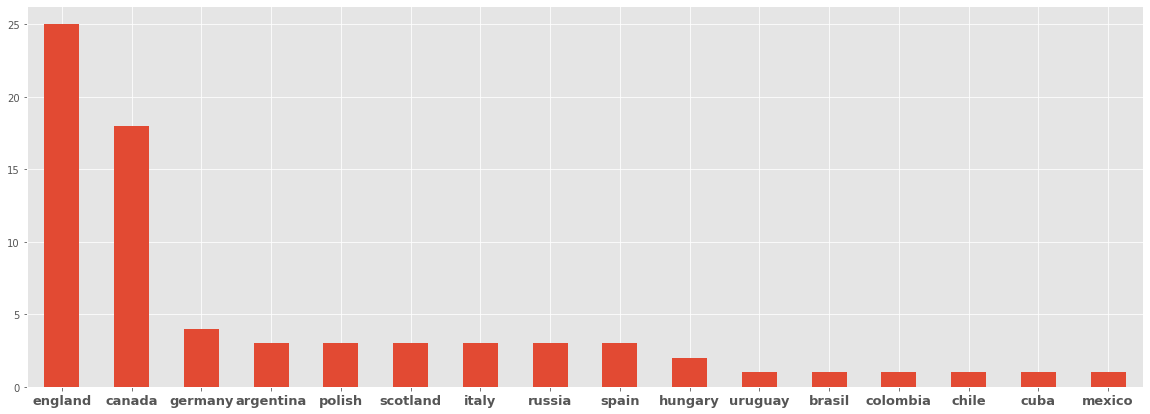

In [238]:
plt.figure(figsize=(20, 7))
df['country'].value_counts().plot(kind = 'bar',)
plt.xticks(rotation =0, fontweight = 'bold', fontsize = 13)


More people from England and Canada participated in the survey

(array([11.,  6., 13.,  6.,  8., 14.,  4.,  5.,  1.,  5.]),
 array([24. , 29.7, 35.4, 41.1, 46.8, 52.5, 58.2, 63.9, 69.6, 75.3, 81. ]),
 <BarContainer object of 10 artists>)

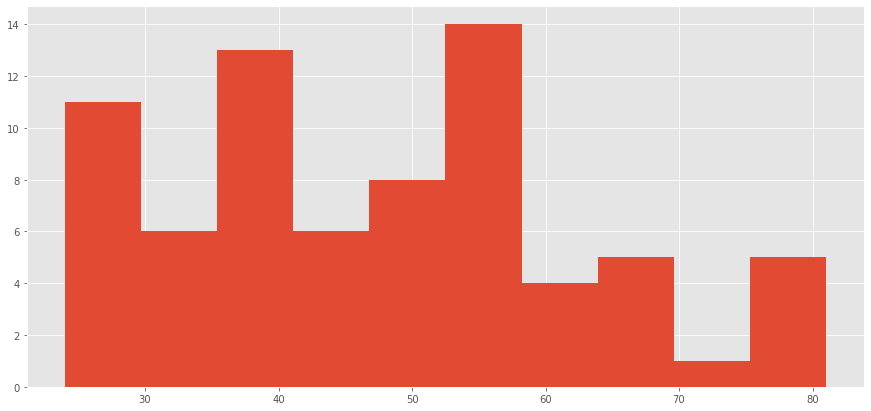

In [239]:
plt.hist('age', data = df) 

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

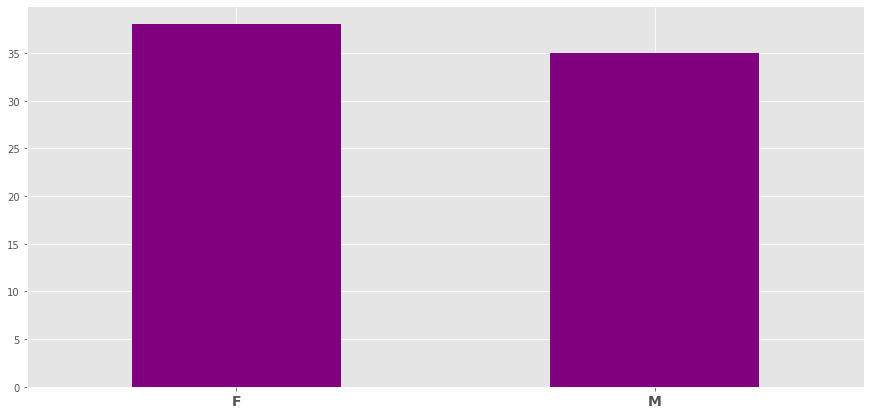

In [240]:
df['sex'].value_counts().plot(kind ='bar', color ='purple')
plt.xticks(rotation =0, fontsize=14,fontweight='bold' )

(array([0, 1, 2]),
 [Text(0, 0, 'likes'), Text(1, 0, 'indiferent'), Text(2, 0, 'dislikes')])

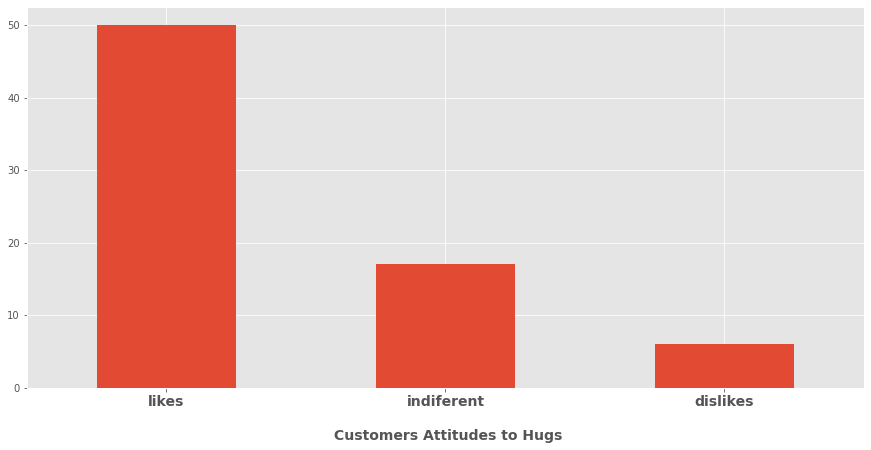

In [241]:
df['GImg1'].value_counts().plot(kind= 'bar')
plt.xlabel("\n Customers Attitudes to Hugs", fontsize=14,fontweight='bold')
plt.xticks(rotation = 0, fontsize=14,fontweight='bold')

On to the main task- identifying different types of customers in the data using patterns aka customer segmentation
###### The data has no label thus, this is a clustering and not a classification task. Clustering simply put is placing items with similar characteristics into buckets.

In [242]:
from kmodes.kprototypes import KPrototypes

K-Prototypes is a clustering algorithim that reduces the overall data into cohorts, with each cohort having similar needs and preferences. The reason to use k-prototypes algorithm was that it can handle both numerical and categorical features simultaneously and the data has mostly categorical columns .

In [243]:
#create an array of the features as kprototypes uses array as input data rather than a DataFrame
df_array = df.values

In [244]:
#Get the position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['sex', 'country', 'returning', 'GImg1', 'GImg2', 'GImg3', 'PImg1', 'PImg2', 'PImg3', 'PImg4', 'PImg5', 'Tense - relaxed', 'Authoritative -anarchic ', 'Hostile - friendly', 'Proxemics', 'TAudio2', 'TAudio3', 'QAudio1', 'QAudio2', 'QAudio3', 'TAudio1']
Categorical columns position  : [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


Use the Elbow method to determine the optimal number of clusters for K-Prototype clusters. Instead of calculating the within the sum of squares errors (WSSE) with Euclidian distance, K-Prototype provides the cost function that combines the calculation for numerical and categorical variables. We can look into the Elbow to determine the optimal number of clusters.

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


Text(0.5, 0, 'Number of clusters')

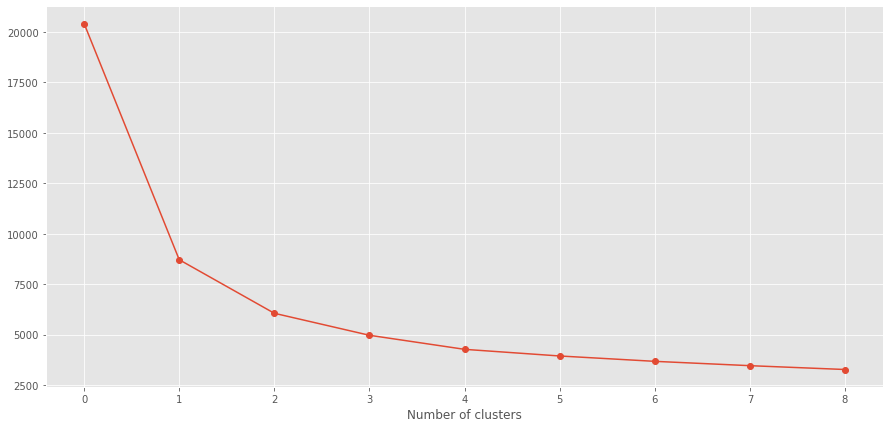

In [245]:
cost =[]

for cluster in range(1,10):
    try:
        KPrototype = KPrototypes(n_jobs= -1, n_clusters= cluster, init = 'Huang', random_state= 0)
        KPrototype.fit_predict(df_array, categorical = catColumnsPos)
        cost.append(KPrototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
plt.plot(cost, marker ='o')
plt.xlabel('Number of clusters')

According to the plot of cost function above, we consider choosing the number of cluster k = 3. It will be the optimal number of clusters for K-Prototype cluster analysis

In [246]:
#Fit the clusters
KPrototype = KPrototypes(n_jobs= -1, n_clusters= 3, random_state=0, init = 'Huang')
KPrototype.fit_predict(df_array, categorical = catColumnsPos)

array([0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0,
       1, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 0, 0], dtype=uint16)

In [247]:

# Cluster centorid
print(KPrototype.cluster_centroids_)
# Check the iteration of the clusters created
print(KPrototype.n_iter_)
# Check the cost of the clusters created
KPrototype.cost_

[['33.515151515151516' 'F' 'england' 'no' 'likes' 'likes' 'likes' 'likes'
  'likes' 'likes' 'likes' 'dislikes' '1' '2' '1' 'C' 'dislikes'
  'dislikes' 'likes' 'dislikes' 'dislikes' 'dislikes']
 ['70.61538461538461' 'M' 'england' 'yes' 'likes' 'likes' 'likes' 'likes'
  'likes' 'likes' 'likes' 'dislikes' '1' '2' '1' 'A' 'dislikes'
  'dislikes' 'likes' 'dislikes' 'dislikes' 'dislikes']
 ['52.81481481481482' 'F' 'canada' 'yes' 'likes' 'likes' 'likes' 'likes'
  'likes' 'likes' 'likes' 'dislikes' '1' '4' '1' 'B' 'dislikes'
  'dislikes' 'likes' 'dislikes' 'dislikes' 'dislikes']]
3


6051.758185960931

What do these clusters describe? The interpretation uses the centroids in each cluster. To do so, we need to append the cluster labels to the raw data and order the cluster labels which will be helpful to arrange the interpretation based on cluster labels.

In [248]:
df['Cluster'] = KPrototype.labels_
df['Segment'] = df['Cluster'].map({0:'First', 1:'Second', 2:'Third'})

#order the clusters
df['Segment'] =df['Segment'].astype('category')
df['Segment']= df['Segment'].cat.reorder_categories(['First', 'Second', 'Third'])

In [249]:
df.head()

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Hostile - friendly,Proxemics,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,TAudio1,Cluster,Segment
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,...,4,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0,First
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,...,2,B,dislikes,dislikes,likes,likes,dislikes,dislikes,2,Third
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0,First
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,...,3,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0,First
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0,First


To interpret the cluster, for the numerical variables, it will be using the average while the categorical using the mode. But there are other methods that can be implemented such as using median, percentile, or value composition for categorical variables.

In [260]:
df.rename(columns = {'Cluster': 'Total'}, inplace = True)
df.groupby('Segment').agg(
    {
        'Total': 'count',
        'age': 'median',
        'country': lambda x: x.value_counts().index[0],
        'returning': lambda x: x.value_counts().index[0],
        'GImg1':lambda x: x.value_counts().index[0],
        'GImg2': lambda x: x.value_counts().index[0],
        'GImg3': lambda x: x.value_counts().index[0],
        'PImg1': lambda x: x.value_counts().index[0],
        'TAudio1': lambda x: x.value_counts().index[0], 
        'TAudio2': lambda x: x.value_counts().index[0],
       'TAudio3': lambda x: x.value_counts().index[0],
       'QAudio1':lambda x: x.value_counts().index[0],
        'QAudio2':lambda x: x.value_counts().index[0],
         'QAudio3':lambda x: x.value_counts().index[0],
         'Hostile - friendly': lambda x: x.value_counts().index[0],
        'Tense - relaxed': lambda x: x.value_counts().index[0],
        'Proxemics': lambda x: x.value_counts().index[0],
        'Authoritative -anarchic ': lambda x: x.value_counts().index[0]
        }).T

Segment,First,Second,Third
Total,33,13,27
age,34.0,67.0,53.0
country,england,canada,canada
returning,no,yes,yes
GImg1,likes,likes,likes
GImg2,likes,likes,likes
GImg3,likes,likes,likes
PImg1,likes,likes,likes
TAudio1,dislikes,dislikes,dislikes
TAudio2,dislikes,dislikes,dislikes


##### 1. Qaudio1 (spitting): It appears all the cohorts spit to express themselves 
##### 2. TAudio1 (authoritative tones): they all dislike it
##### 3. In terms of proximity (Proxemics), the first segment would rather maintain a socially acceptable amount of distance, the second segment prefers intimate treatment  and the third like to maintain distance of at least an arm's length 
##### 4. Looking at the observed emotional clime (Authoritative -anarchic) of the cohort, segments 1 and 2 respect order, segment 3 would most likely flout rules or prefer unconventional interactions